<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Day_5_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv("train.csv",usecols=["Survived","Age","Fare"])

In [6]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [5]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

/tmp/ipython-input-5-2595122914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

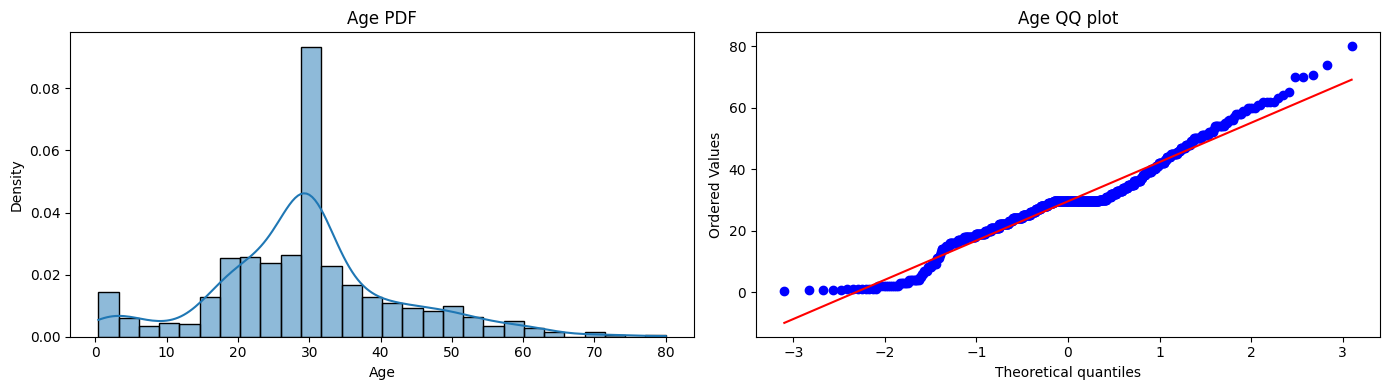

In [16]:
plt.figure(figsize=(14, 4))

# Histogram / PDF Plot
plt.subplot(1, 2, 1)
sns.histplot(X_train["Age"], kde=True,stat="density")
plt.title("Age PDF")

# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ plot")

plt.tight_layout()
plt.show()

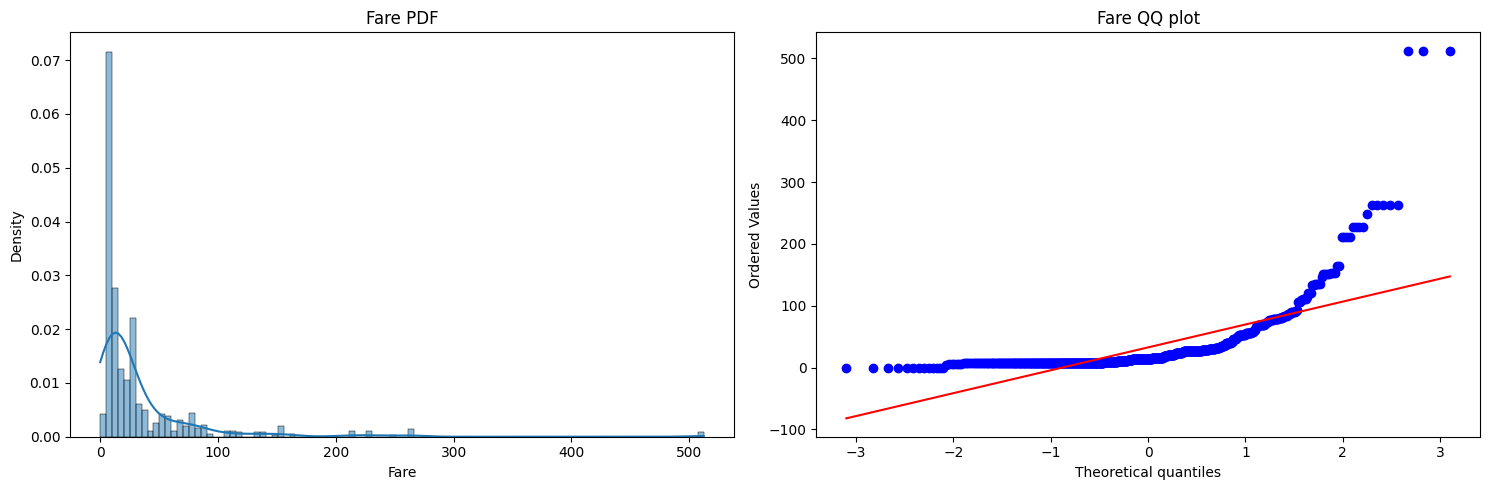

In [19]:
plt.figure(figsize=(15, 5))

# Histogram / PDF Plot
plt.subplot(1, 2, 1)
sns.histplot(X_train["Fare"], kde=True,stat="density")
plt.title("Fare PDF")

# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ plot")

plt.tight_layout()
plt.show()

We can clearly see that the fare is right skewed so we can clearly go for log transform

In [20]:
# Now trainng the model without transformation
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [21]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [22]:
trf = FunctionTransformer(np.log1p)

In [24]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [28]:
X_train_transformed.sample(2)

,Age,Fare
552,3.424234,2.178064
595,3.610918,3.224858


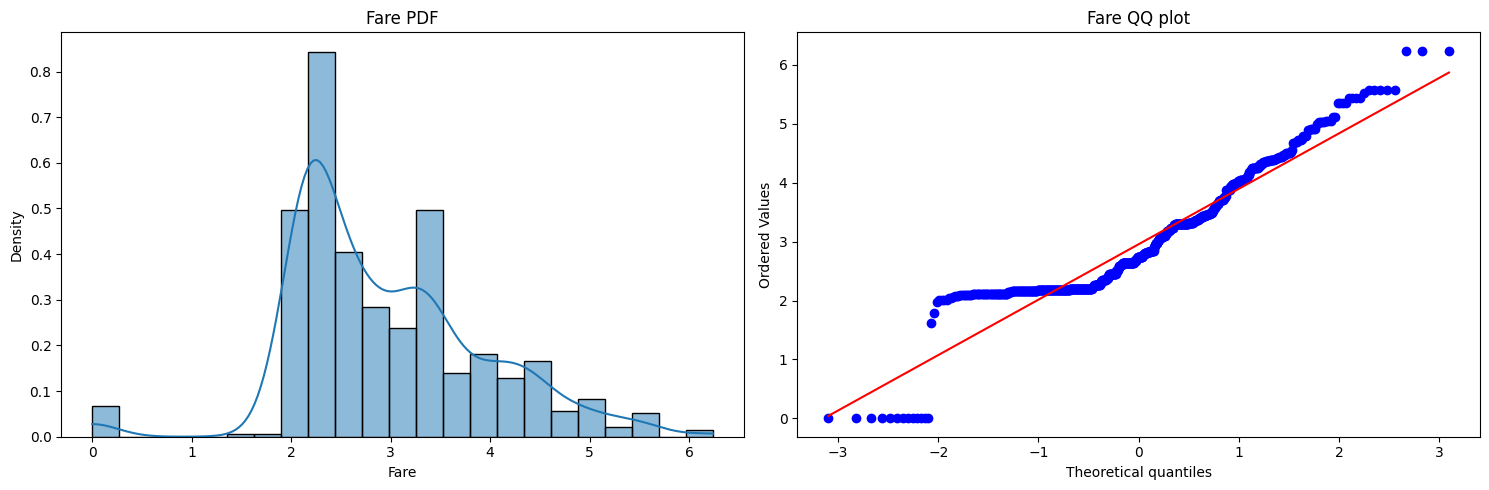

In [31]:
# Checking normality distribution after transforming
plt.figure(figsize=(15, 5))

# Histogram / PDF Plot
plt.subplot(1, 2, 1)
sns.histplot(X_train_transformed["Fare"], kde=True,stat="density")
plt.title("Fare PDF")

# QQ Plot
plt.subplot(1, 2, 2)
stats.probplot(X_train_transformed["Fare"], dist="norm", plot=plt)
plt.title("Fare QQ plot")

plt.tight_layout()
plt.show()

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [26]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


Cross Validating

In [36]:
X_tranformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_tranformed,y,cv=10,scoring="accuracy")))
print("DT",np.mean(cross_val_score(clf2,X_tranformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.657752808988764
